# *fiasco*: Testing the Package--Write Tests
Test the packages ability to build up a single-file HDF5 database from the dataframes that were parsed from the files.

In [1]:
import os
import warnings
import h5py
import numpy as np
#import pandas
import astropy.units as u
import astropy.constants as const
from astropy.table import Column,Table
from astropy.utils.console import ProgressBar
import fiasco.io
import fiasco
import matplotlib.pyplot as plt
import seaborn as sns
import fortranformat
import periodictable

%matplotlib inline

In [2]:
skip_dirs = ['abundance','ip','ancillary_data','continuum','dem','ioneq','masterlist']
all_files = []
for topdir,subdir,files in os.walk(fiasco.defaults['chianti_dbase_root']):
    if np.any([sd in topdir for sd in skip_dirs]):
        continue
    if topdir == fiasco.defaults['chianti_dbase_root']:
        continue
    files = [file for file in files if file[0] != '.']
    all_files += files

In [3]:
abund_files = [file for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance')) 
               if file[0]!='.' and os.path.isfile(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance',file))]
abund_files += [os.path.join('version_3',file) for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance','version_3'))
                if file[0]!='.']

In [4]:
ioneq_files = [file for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq')) 
               if file[0]!='.' and os.path.isfile(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq',file))]
ioneq_files += [os.path.join('deprecated',file) for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq','deprecated'))
                if file[0]!='.']

In [ ]:
ip_files = ['chianti.ip']

In [ ]:
all_files += abund_files + ioneq_files + ip_files

How to handle these few corner cases where the filename+extension pattern is not followed? Do these files even matter that much? 

In [ ]:
all_files = [af for af in all_files if '_all.' not in af and len(af.split('.'))==2]

In [ ]:
with ProgressBar(len(all_files),ipython_widget=True,) as progress:
    with h5py.File(fiasco.defaults['chianti_hdf5_dbase_root'],'a') as hf:
        for file in all_files:
            parser = fiasco.io.Parser(file)
            try:
                df = parser.parse()
            except NotImplementedError:
                print('Parser for {} not implemented'.format(file))
                continue
            parser.to_hdf5(hf,df)
            progress.update()

Create group from filetype name.

Create dataset for each column in the group.

## Ion Filetypes
These should all work as is with the default HDF5 writer. Just go through and print them to the HDF5 database or do it all at once.

In [ ]:
elvlc_files = [file for file in all_files if os.path.splitext(file)[1] == '.elvlc']

In [ ]:
with ProgressBar(len(elvlc_files),ipython_widget=True,) as progress:
    with h5py.File('/Users/willbarnes/.fiasco/chianti_dbase.h5','a') as hf:
        for file in elvlc_files:
            parser = fiasco.io.Parser(file)
            df = parser.parse()
            parser.to_hdf5(hf,df)
            progress.update()

In [ ]:
wgfa_files = [file for file in all_files if os.path.splitext(file)[1] == '.wgfa']

In [ ]:
with ProgressBar(len(wgfa_files),ipython_widget=True,) as progress:
    with h5py.File('/Users/willbarnes/.fiasco/chianti_dbase.h5','a') as hf:
        for file in wgfa_files:
            parser = fiasco.io.Parser(file)
            df = parser.parse()
            parser.to_hdf5(hf,df)
            progress.update()

In [ ]:
psplups_files = [file for file in all_files if os.path.splitext(file)[1] == '.psplups']

In [ ]:
with ProgressBar(len(psplups_files),ipython_widget=True,) as progress:
    with h5py.File('/Users/willbarnes/.fiasco/chianti_dbase.h5','a') as hf:
        for file in psplups_files:
            parser = fiasco.io.Parser(file)
            df = parser.parse()
            parser.to_hdf5(hf,df)
            progress.update()

In [ ]:
scups_files = [file for file in all_files if os.path.splitext(file)[1] == '.scups']

In [ ]:
with ProgressBar(len(scups_files),ipython_widget=True,) as progress:
    #with h5py.File('/Users/willbarnes/.fiasco/chianti_dbase.h5','a') as hf:
    for file in scups_files:
        parser = fiasco.io.Parser(file)
        df = parser.parse()
        if df is None:
            print(file)
        #parser.to_hdf5(hf,df)
        progress.update()

### Sandbox

In [ ]:
parser = fiasco.io.Parser(scups_files[0])
df = parser.parse()

In [ ]:
df

In [ ]:
df['Burgess-Tully scaled effective collision strengths'][0].dtype

In [ ]:
for cn in df.colnames:
    col = df[cn]
    print(cn)
    if type(col) == u.Quantity:
        col = df[cn].value
    else:
        col = df[cn].data
    for i,row in enumerate(col):
        if row.dtype == np.dtype('O'):
            col[i] = col[i].astype(np.dtype('float64'))
            print(col[i].dtype)
    if col.dtype == np.dtype('O'):
        print([r.dtype for r in col])

In [ ]:
tab = Table([[1,2,3],
             [4,5,6],
             np.array([np.random.rand(10),np.random.rand(3),np.random.rand(10)]),
             np.array([np.random.rand(7),np.random.rand(7),np.random.rand(7)])])

In [ ]:
tab = df

In [ ]:
tab

In [ ]:
for cn in tab.colnames:
    all_equal = np.all(np.array([r.size for r in tab[cn]]) == tab[cn][0].size)
    if tab[cn].dtype == np.dtype('O') and all_equal:
        tab[cn] = tab[cn].astype(np.dtype('float64'))

In [ ]:
tab['Burgess-Tully scaled temperatures'].data[0].dtype

In [ ]:
tab['col2'][1]

## Non-ion Filetypes

TODO: implement HDF5 writers for the non-ion filetypes:

- ~~abundance~~
- ioneq
- ~~ionization potential~~

### Abundance

In [ ]:
abund_files = [file for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance')) 
               if file[0]!='.' and os.path.isfile(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance',file))]
abund_files += [os.path.join('version_3',file) for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance','version_3'))
                if file[0]!='.']

In [ ]:
with ProgressBar(len(abund_files),ipython_widget=True,) as progress:
    with h5py.File(fiasco.defaults['chianti_hdf5_dbase_root'],'a') as hf:
        for file in abund_files:
            parser = fiasco.io.Parser(file)
            df = parser.parse()
            parser.to_hdf5(hf,df)
            progress.update()

### Ionization Equilibrium

In [ ]:
ioneq_files = [file for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq')) 
               if file[0]!='.' and os.path.isfile(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq',file))]
ioneq_files += [os.path.join('deprecated',file) for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq','deprecated'))
                if file[0]!='.']

In [ ]:
with ProgressBar(len(ioneq_files),ipython_widget=True,) as progress:
    with h5py.File(fiasco.defaults['chianti_hdf5_dbase_root'],'a') as hf:
        for file in ioneq_files:
            parser = fiasco.io.Parser(file)
            df = parser.parse()
            parser.to_hdf5(hf,df)
            progress.update()

### Ionization Potential

In [ ]:
with h5py.File(fiasco.defaults['chianti_hdf5_dbase_root'],'a') as hf:
    parser = fiasco.io.Parser('chianti.ip')
    df = parser.parse()
    parser.to_hdf5(hf,df)


## Access Tests Sandbox

In [5]:
test = fiasco.IonBase('h_1')

In [6]:
test.elvlc

h/h_1/elvlc
        
Fields
------
configuration  -- [description]
level index  -- [description]
level label  -- [description]
multiplicity  -- [description]
observed energy (1 / cm) -- [description]
orbital angular momentum  -- [description]
theoretical energy (1 / cm) -- [description]
total angular momentum  -- [description]

Footer
------
%filename: h_1.elvlc
%observed energy levels: Fuhr et al, 1999, NIST Atomic Spectra Database Version 2.0
%produced as part of the Arcetri/Cambridge/NRL 'CHIANTI' atomic data base collaboration
%
%  Ken Dere  May 3 2001

        

In [7]:
test.wgfa

h/h_1/wgfa
        
Fields
------
lower level index  -- [description]
lower level label  -- [description]
oscillator strength  -- [description]
radiative decay rate (1 / s) -- [description]
transition wavelength (Angstrom) -- [description]
upper level index  -- [description]
upper level label  -- [description]

Footer
------
%filename: h_1.wgfa
% observed energy levels: Fuhr et al, 1999, NIST Atomic Spectra Database Version 2.0,
%oscillator strengths: Wiese,W.L., Smith,M.W., Glennon,B.M., 1966, Atomic Transition Probabilities, NSRDS-NBS-4
% A values (1s-2s): Parpia,F.A., Johnson,W.R., 1982, Phys.Rev.A, 26, 1142.
%comment: Wavelengths have been calculated the original energy levels from NIST, that include more
          decimal figures than allowed by CHIANTI format.
%produced as part of the Arcetri/Cambridge/NRL 'CHIANTI' atomic data base collaboration
%
%  Ken Dere  May 2001
 -1

        

In [8]:
test.diparams['scaled cross-section']

<Quantity [[ 0.   , 1.355, 2.386, 3.015, 2.598, 1.85 ]]>

In [9]:
test.ip['chianti']

<Quantity 109678.7737 1 / cm>

In [13]:
test.ioneq['arnaud_raymond']

h/h_1/ioneq/arnaud_raymond
        
Fields
------
ionization fraction  -- [description]
temperature (K) -- [description]

Footer
------
%filename: arnaud_raymond.ioneq
%ionization equilibrium: Arnaud, M., Rothenflug, R., 1985, AASS, 60, 425
%Fe ionization equilibrium: Arnaud, M., Raymond, J.C., 1992, ApJ, 398, 39
% produced as part of the Arcetri/Cambridge/NRL 'CHIANTI' atomic data base collaboration
%
% Enrico Landi Jan 2003
 -1

        

In [14]:
iron_ions = ['fe_{}'.format(int(i)) for i in np.linspace(1,26,26)]

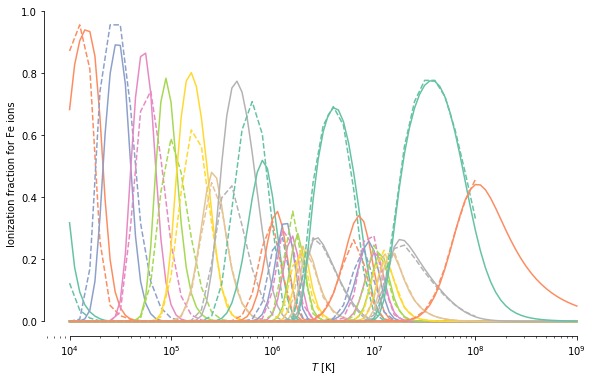

In [15]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('Set2',n_colors=len(iron_ions))
for c,fe_ion in zip(colors,iron_ions):
    ioneq = fiasco.IonBase(fe_ion).ioneq
    plt.plot(ioneq['chianti']['temperature'],ioneq['chianti']['ionization fraction'],color=c)
    plt.plot(ioneq['arnaud_raymond']['temperature'],ioneq['arnaud_raymond']['ionization fraction'],ls='--',color=c)
plt.xscale('log')
plt.ylabel(r'Ionization fraction for Fe ions')
plt.xlabel(r'$T$ [K]')
#plt.xlim([2e5,2e6])
sns.despine(trim=True)